Stock Price Prediction – Using Time Series Forecasting with ARIMA.

In [1]:
!pip install pmdarima
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.7 MB/s eta 0:00:00


In [2]:
!pip install prophet
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bcb1b204fffefd27c9e882950578a4880e7dffa1eac117f3f2771d352a2f4005
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

In [3]:

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
data = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [8]:
data.duplicated().sum()


0

VISUALIZATION

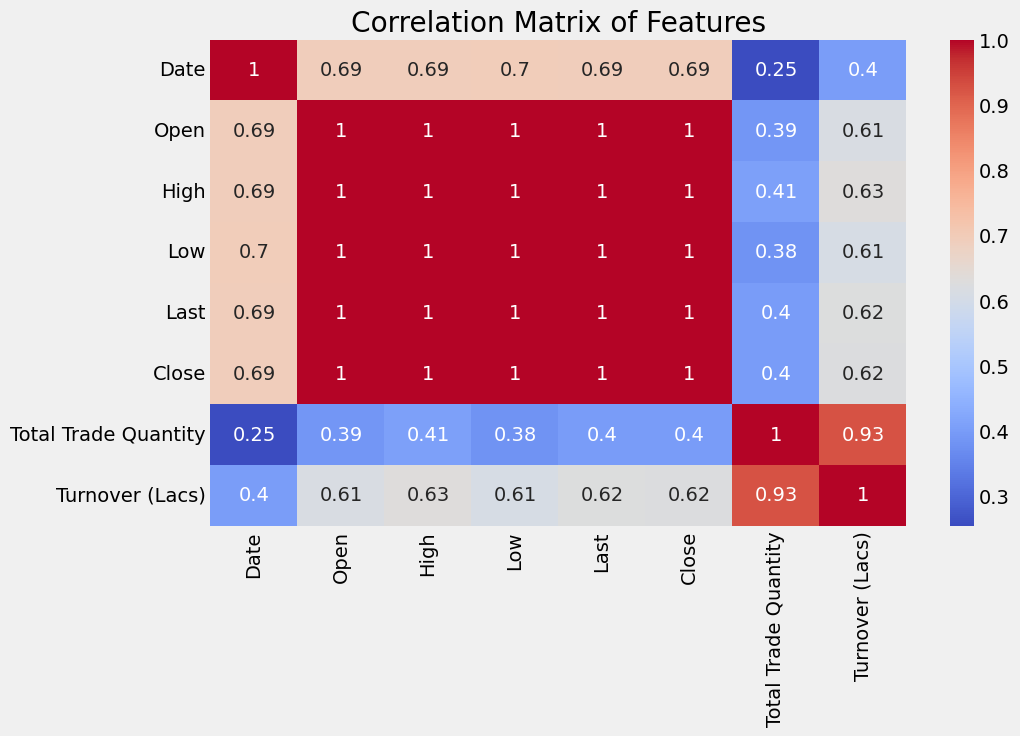

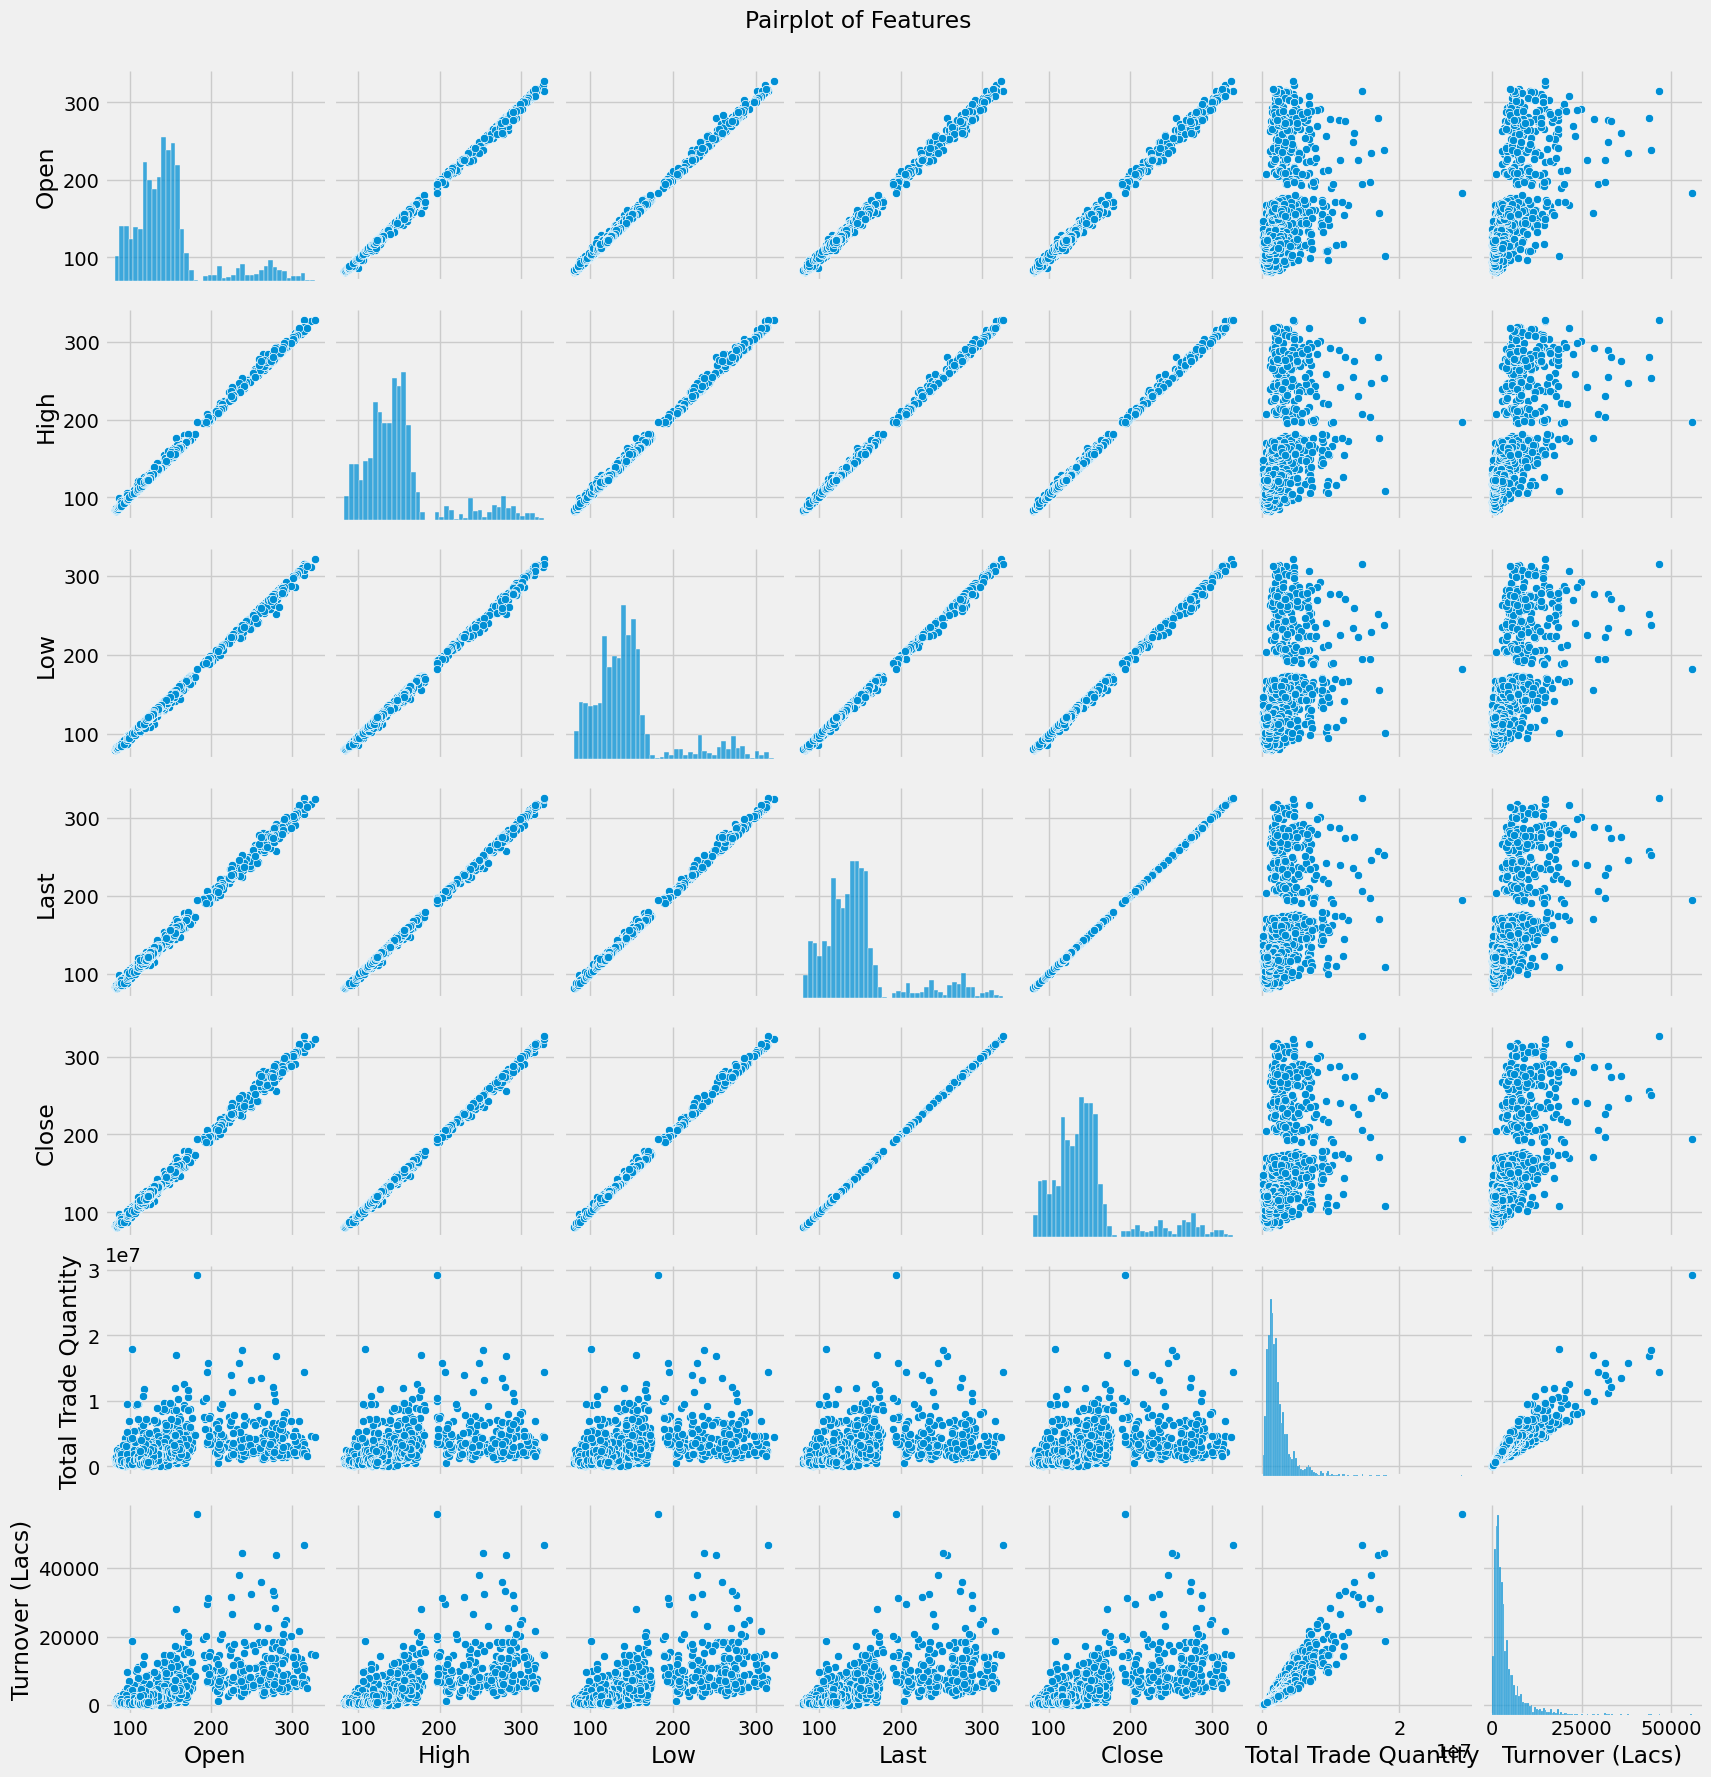

In [11]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot to visualize relationships between pairs of variables
sns.pairplot(data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


In [ ]:
FEATURE ENGINEERING

[link text](https://)

In [12]:
data['Lagged_Close'] = data['Close'].shift(1)
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Lagged_Close
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,233.75
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,233.25
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,234.25
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,236.10


In [13]:
#Rolling mean and standard deviation
data['Rolling_Mean'] = data['Close'].rolling(window=7).mean()
data['Rolling_Std'] = data['Close'].rolling(window=7).std()

data['Rolling_Max'] = data['Close'].rolling(window=7).max()
data['Rolling_Min'] = data['Close'].rolling(window=7).min()

print(data.head(15))


         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
5  2018-09-21  235.00  237.00  227.95  233.75  234.60               5395319   
6  2018-09-19  235.95  237.20  233.45  234.60  234.90               1362058   
7  2018-09-18  237.90  239.25  233.50  235.50  235.05               2614794   
8  2018-09-17  233.15  238.00  230.25  236.40  236.60               3170894   
9  2018-09-14  223.45  236.70  223.30  234.00  233.95               6377909   
10 2018-09-12  216.35  223.70  212.65  221.65  222.65               4570939   
11 2018-09-11  222.50  225.40  214.85  216.35  216.0

MODEL TRAINING

In [26]:
import numpy as np

def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])

    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]

    print('STOCK PRICE PREDICTION BY MOVING AVERAGE')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)

    preds = []
    for i in range(0, valid_set.shape[0]):
        a = train_set['Open'][len(train_set) - valid_set.shape[0] + i:].sum() + sum(preds)
        b = a / (valid_set.shape[0])
        preds.append(b)

    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Open']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    valid_set['Predictions'] = preds

    plt.figure(figsize=(6, 4))
    plt.plot(train_set['Open'])
    plt.plot(valid_set[['Open', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Log-transformed Open Price', size=20)
    plt.title('Log-transformed Open Price Prediction by Moving Averages', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
from math import ceil, floor

In [27]:

def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])

    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]
    print('STOCK PRICE PREDICTION USING ARIMA')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    training = train_set['Open']
    validation = valid_set['Open']
    model = auto_arima(training, start_p=0, start_q=0, max_p=3, max_q=3, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=len(validation))
    forecast.index = validation.index
    forecast = pd.DataFrame(forecast,columns =['Prediction'])
    rms = np.sqrt(np.mean(np.power((np.array(validation) - np.array(forecast['Prediction'])), 2)))
    print('RMSE value on validation set:', rms)

    plt.figure(figsize=(8, 4))
    plt.plot(train_set['Open'])
    plt.plot(valid_set['Open'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Auto ARIMA', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

In [28]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Lagged_Close,Rolling_Mean,Rolling_Std,Rolling_Max,Rolling_Min
Date,,,,,,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN,NaN,NaN,NaN,NaN
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,233.75,NaN,NaN,NaN,NaN
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,233.25,NaN,NaN,NaN,NaN
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,234.25,NaN,NaN,NaN,NaN
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,236.10,NaN,NaN,NaN,NaN


STOCK PRICE PREDICTION USING ARIMA
Shape of Training Set: (1832, 1)
Shape of Validation Set: (203, 1)
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8643.317, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8659.918, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8660.170, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8644.572, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8658.171, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8658.174, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8657.109, Time=2.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8661.232, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8659.235, Time=1.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8659.215, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8661.002, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-8663.091, Time=0.97 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-8657.609

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE value on validation set: 0.14870026437403563


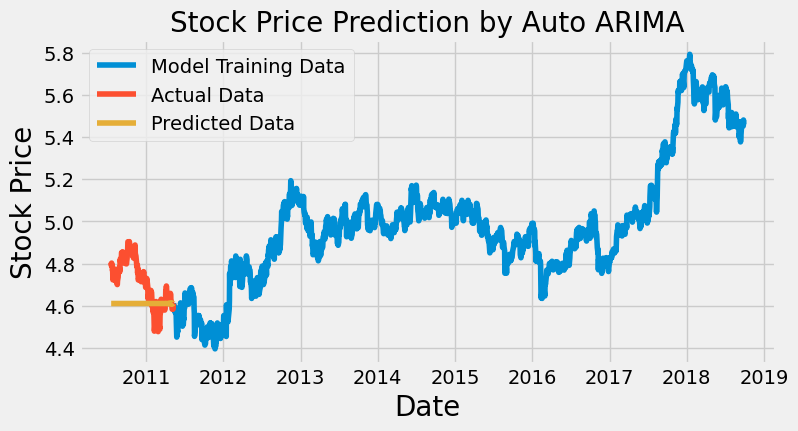

In [29]:
moving_avg_prediction(data)

DIMENSIONALITY REDUCTION

In [30]:
import pandas as pd
data=pd.read_csv('/content/iris_dataset.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

array([0.72770452, 0.23030523])

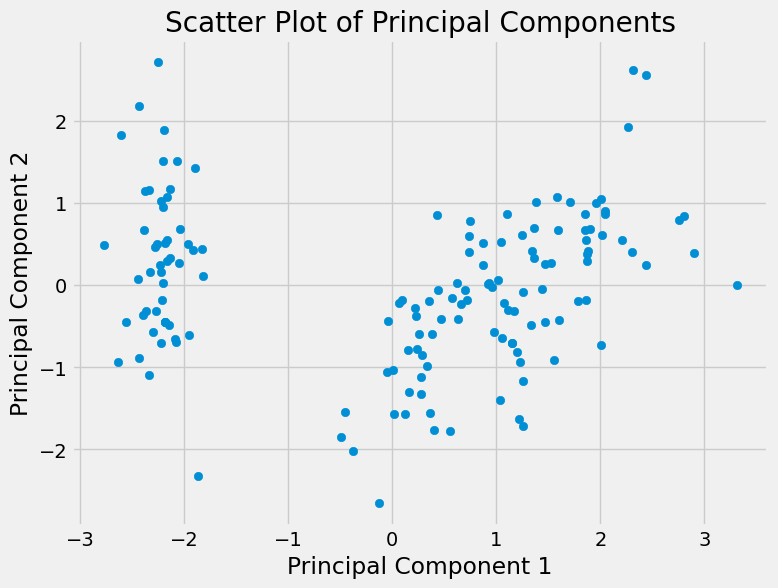

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()